In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import gc

In [4]:
# reading training data
data=pd.read_csv("../input/yahoo-troll-question-detection/train_df.csv")
data.head()

,qid,question_text,target
0,dda0b0efc8ba86e81ec4,What are interesting facts about Microsoft his...,0
1,dc708b74a108d0fc0ad9,What are those things which are not gonna happ...,0
2,06a27ec5d82dacd8bfe0,"What should I know to avoid being ""upsold"" whe...",0
3,00cbb6b17e3ceb7c5358,How I add any account with payment bank?,0
4,7c304888973a701585a0,Which Multi level marketing products are actua...,0


# **Data Cleaning**


In [5]:
data=data.drop(['qid'],axis=1)
data.head(2)

,question_text,target
0,What are interesting facts about Microsoft his...,0
1,What are those things which are not gonna happ...,0


In [6]:
data.isna().sum()

question_text    0
target           0
dtype: int64

In [7]:
data.shape

(1000000, 2)

# ****EDA****

In [10]:
data['target'].value_counts()

0    938130
1     61870
Name: target, dtype: int64

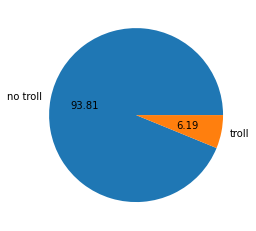

In [11]:
plt.pie(data['target'].value_counts(),labels=['no troll','troll'],autopct="%0.2f")
plt.show()

# ****Data Preprocessing****

In [12]:
## importing libraries for preprocessing
import nltk
import re
nltk.download('stopwords')
nltk.download('omw-1.4')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ob=PorterStemmer()
lt=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [13]:
def lowercase(text):
    text=text.lower()
    #print(text)
    return text

In [14]:
def tokenize(text):
    text=text.split()
    #print(text)
    return text
    

In [15]:
def regularization(text):
    text=re.sub('[^a-zA-Z]',' ',text)
    #print(text)
    return text
    

In [16]:
def removestopword(text):
    text=[word for word in text if not word in stopwords.words('english')]
    #print(text)
    return text

In [17]:
def stemming(text):
    tt=[ob.stem(word) for word in text]
    text=tt[:]
    #print(text)
    return text
        
    

In [18]:
def lemmatizer(text):
    tp=[lt.lemmatize(word) for word in text]
    text=tp[:]
    #print(text)
    return text


In [20]:
## function for preprocessing of a text
def processing_text(text):
    text=regularization(text)
    text=lowercase(text)
    text=tokenize(text)
    #print(text)
    text=removestopword(text)
    text=lemmatizer(text)
    text=stemming(text)
    text=" ".join(text)
    return text

         

In [21]:
## text after preprocessing
## Example
print("Statement: How can we prove that ( [math]\pi, e, \sqrt[3]{3})[/math] are non-existing and fiction numbers in elementary pure mathematics?")
processing_text("How can we prove that ( [math]\pi, e, \sqrt[3]{3})[/math] are non-existing and fiction numbers in elementary pure mathematics?") 

Statement: How can we prove that ( [math]\pi, e, \sqrt[3]{3})[/math] are non-existing and fiction numbers in elementary pure mathematics?


'prove math pi e sqrt math non exist fiction number elementari pure mathemat'

In [ ]:
## preprocessing the training dataset


# processed_text=[]
# for i in range(len(data)):
#     processed_text.append(processing_text(data['question_text'][i]))
# # processed_text
    
    
    

In [36]:
# # reading testing dataset

# test_data=pd.read_csv('../input/yahoo-troll-question-detection/test_df.csv')
# test_data.head(5)

,qid,question_text
0,a4f3da3a3df9dd881edd,My period is due on my wedding day. How can I ...
1,9914c62ed3f69684d549,How many numbers higher than a million can be ...
2,8138ae48649e37091a91,"How come I feel nothing for my family, but sti..."
3,981b4753d17ef14d09f7,"In case of collapse of the Democratic party, w..."
4,452e2c705276ba16b7b7,Who is Émile Naoumoff?


In [23]:
## droping unnecessary columns of test data
# test_data=test_data.drop(['qid'],axis=1)
# print(test_data.head(3))
# print(test_data.shape)

In [ ]:
## preprocessing of testing dataset

# test_processed=[]
# for i in range(len(test_data)):
#     test_processed.append(processing_text(test_data['question_text'][i]))
# #test_processed

In [24]:
## saving preprocessed data using pickle in lemmstemm dataset

# file1='trained_preprocessedls_data.pkl'
# file2='test_preprocessed_datals.pkl'
# pickle.dump(processed_text, open(file1,'wb'))
# pickle.dump(test_processed, open(file2,'wb'))


In [25]:
## loading the saved preprocessed(lemmatized + stemming) training and testing data

processedtext=pickle.load(open('../input/lemmstemm/trained_preprocessedls_data.pkl','rb'))
testprocessed=pickle.load(open('../input/lemmstemm/test_preprocessed_datals.pkl','rb'))

In [28]:
## merging the preprocessed training and testing data for their conversion to vectors
mergeddata=processedtext+testprocessed
print(len(mergeddata))

1306122


In [29]:
## importing libraries for TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=4000)

In [30]:
## vectorization of training and testing data

Tfdif_X=tfidf.fit_transform(mergeddata).toarray()   #TF-IDF

In [32]:
## spliting the training and testing data after vectorizaion
traindata=Tfdif_X[0:len(processedtext),:]
testdata=Tfdif_X[len(processedtext):,:]
print(traindata.shape)
print(testdata.shape)


(1000000, 4000)
(306122, 4000)


In [33]:
## target for training data
Y_train=data['target'][:]

# Undersampling as dataset is imbalanced

In [34]:
## undersampling the imbalanced data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(traindata,Y_train)


# ****Training Data****

# Using Different Models on Preprocessed Data

# 1. Logistic Regression

In [ ]:
## importing model for training
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
model1=lr.fit(traindata,Y_train)     ## applying logistic regression on preprocessed data
model2=lr.fit(X_res,y_res)           ## applying logistic regression on undersampled data

In [ ]:
y_pred_lr=model1.predict(testdata)  ## predicting the testdata using logistic model
y_pred_lr_1=model2.predict(testdata)

accuracy on kaggle for logistic regression
* preprocessed data(stemming+tfidf): 0.47349
* preprocessed data(lemm+stem+tfidf): 0.47799
* preprocessed data(lemm+stemm+ cv): 0.40186
* preprocessed data (7000 features+tfidf): 0.48677
* undersampled data(tfidf): 0.45994
* undersampled data(grid search): 0.45994



# 2. Logistic Regression with Grid SearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model2 = LogisticRegression(solver = 'liblinear')

In [ ]:
log_params = [{'solver' : ['liblinear'],'penalty' : ['l2'],'C' : [100, 10, 1.0, 0.1, 0.01,0.001]}]

In [ ]:
gscv = GridSearchCV(estimator = log_model2,param_grid = log_params,cv = 5,scoring = 'f1')

In [ ]:
gscv.fit(X_res,y_res)

In [ ]:
y_pred_lr_us1=gscv.predict(testdata)

In [ ]:
type(y_pred_lr_us1)

accuracy on kaggle for logistic regression with grid search
* undersampled data(grid search): 0.45994

# 3.Naive Bayes (Multinomial)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
model3=nb.fit(traindata,Y_train)    ## applying naive bayes on preprocessed data
model4=nb.fit(X_res,y_res)          ## applying naive bayes on undersampled data

In [ ]:
y_pred_nb=model3.predict(testdata)  ## predicting the test data using naive bayes model
y_pred_nb_1=model4.predict(testdata)

accuracy on kaggle for naive bayes
* preprocessed data(stemming): 0.30372
* preprocessed data(lemm+stemm): 0.31968
* preprocessed data(taking 7000 features): 0.33462
* undersampled data: 0.35487

# 4. Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb_model1 = GaussianNB()
gnb_model1 = gnb_model1.fit(X_res,y_res) ## applying gaussian naive bayes on undersampled data (tf-idf)

In [ ]:
y_pred_gnb_us_1= gnb_model1.predict(testdata) #for tf-idf

accuracy on kaggle for gaussian naive bayes
* preprocessed data(lemm)+ count vectorizer+ undersampled(taking 1000 features): 0.19661
* preprocessed data(lemm)+ count vectorizer+ undersampled(taking 2000 features): 0.19287


# 5. Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
modelrf=rf.fit(X_res,y_res)       ## applying random forest on undersampled data


In [ ]:
y_pred_rf=modelrf.predict(testdata)  ## predict the testdata using random forest

accuracy for random forest on kaggle
* undersampled data: 0.38528


# 6. Decision Tree with Grid SearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [ ]:
dt_params = [{'max_depth' : [10,20,27,50,100],'min_impurity_decrease' : [0.1,0.2,0.3]}]


In [ ]:
gscv = GridSearchCV(estimator = dt_model,param_grid = dt_params,cv = 5,scoring = 'f1')

In [ ]:
gscv.fit(X_res,y_res)

In [ ]:
y_pred_dt_us1=gscv.predict(testdata)

accuracy for decision tree
* still working as for following parameters we are getting 0 score for both tf-idf and count vectorizer

# 7. SVM

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',random_state=42,gamma=0.001,C=80)
model_svm=svm.fit(X_res,y_res)      ## applying svm on undersampled data

In [ ]:
y_pred_svm=model_svm.predict(testdata)  ## predicting the test data using SVM

accuracy for svm
* still working as the session is going on for more than 12 hours

# Observations on Data without preprocessing

In [37]:
## creating X and Y and doing observations on data without preprocessing

X=data['question_text']        ## data for X_train
Y=test_data['question_text']   ## ata for testing
print(X.shape)
print(Y.shape)

(1000000,)
(306122,)


In [38]:
mergedata=X.append(Y,ignore_index=True) ## merging the train and test data for conversion to vectos
print(mergedata.shape)

(1306122,)


In [ ]:
## importing libraries for Bag of words
## applying bag of words for conversion of words to vector without preprocessing of data
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


In [ ]:
Cv_X=cv.fit_transform(mergedata)    # BAG OF WORDS


In [ ]:
## splitting the training and testing data from merged data

traindata_cv=Cv_X[0:len(X),:]
testdata_cv=Cv_X[len(X):,:]


# 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
model1=lr.fit(traindata_cv,Y_train)     ## applying logistic regression to cv data

In [ ]:
y_pred_lr=model1.predict(testdata)     ## predicting the test data

accuracy for logistic regression
* without preprocessing+bag of words : 0.54752

In [ ]:
## importing model for training by tuning the hyperparameters
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=2500,tol=0.0009,solver='saga',class_weight={0:0.215,1:0.785})
model_1=lr.fit(traindata,Y_train)

In [ ]:
y_predi_lr=model_1.predict(testdata)

 by tuning the variour hyper parameter and by giving our class weight as our data is unbalanced we got satisfactory results as follows:-

* **itr**          **alpha**        **classwt-0:1**           **accuracy** 

* 1000             0.0001                  20:80                0.6248
* 1000             0.0001                  21:79                0.5708
* 1500             0.0001                  20:80                0.57137
* 1500             0.0001                  21:79                0.56971
* 2000             0.0001                  20:80                0.62455
* 2000             0.0001                  21:79                0.62536
* 2000             0.0009                  21:79                0.6259
* 2000             0.0008              21.5:78.5                0.62598
* 2000             0.0009              21.5:78.5                0.62607
* 2500             0.0009              21.5:78.5                0.62585

# 2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
modelrf=rf.fit(traindata_cv,Y_train)  ## applying random forest to cv data  


In [ ]:
y_pred_rf=modelrf.predict(testdata)  ## predicting the test data

accuracy for random forest
* without preprocessing+bag of word : .21314

# **Observation on data by removing urls only**

In [ ]:
def remove_url(text):
    text=text.replace("http//:","")
    #text=re.sub('[^http//]',' ',text)
    #print(text)
    return text
    

In [ ]:
def processing_text(text):
    text=remove_url(text)
    return text

         

In [ ]:
# # preprocessing the training dataset


# processed_text=[]
# for i in range(len(data)):
#     processed_text.append(processing_text(data['question_text'][i]))
# # processed_text

In [ ]:
# # preprocessing of testing dataset

# test_processed=[]
# for i in range(len(tstdata)):
#     test_processed.append(processing_text(tstdata['question_text'][i]))
# #test_processed

In [ ]:
# # saving preprocessed data using pickle

# file1='trained_preprocessedurl_data.pkl'
# file2='test_preprocessedurl_data.pkl'
# pickle.dump(processed_text, open(file1,'wb'))
# pickle.dump(test_processed, open(file2,'wb'))


In [ ]:
## loading the saved preprocessed training and testing data

processedtext=pickle.load(open('/kaggle/input/processed-data-url/trained_preprocessedurl_data.pkl','rb'))
testprocessed=pickle.load(open('/kaggle/input/processed-data-url/test_preprocessedurl_data.pkl','rb'))

In [ ]:
## merging the preprocessed training and testing data for their conversion to vectors
mergeddata=processedtext+testprocessed

In [ ]:
## converion of words to vector

Cv_X=cv.fit_transform(mergeddata)    # BAG OF WORDS
# Tfidf_X=tfidf.fit_transform(mergeddata) 

In [ ]:
traindata=Tfidf_X[0:len(processedtext),:]
testdata=Tfidf_X[len(processedtext):,:]
print(traindata.shape)
print(testdata.shape)


In [ ]:
## importing model for training
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=2000,tol=0.0001,solver='saga',class_weight={0:0.21,1:0.79})
model1=lr.fit(traindata,Y_train)

In [ ]:
y_pred_lr=model1.predict(testdata)

In [ ]:
lrtst=pd.DataFrame({'qid':tstdata['qid'],'target':y_pred_lr})

In [ ]:
lrtst.to_csv('lrmodel_url_tfidf_0.0001_21_79_3000.csv',index=False)

by tuning the variour hyper parameter and by giving our class weight as our data is unbalanced we got satisfactory results as follows:-

* **itr**          **alpha**        **classwt-0:1**           **accuracy** 

* 1500             0.0001                  20:80                0.62455
* 2000             0.0005                  20:80                0.60988
* 2500             0.01                    20:80                0.60985
* 1500             0.0001                  21:79                0.62543
* 2000             0.0001                  21:79                0.62536
* 2500             0.0001                  21:79                0.60918
* 3000             0.0001                  21:79                0.60916
* 2000             0.0005                  21:79                0.60918